In [1]:
import matplotlib.pyplot as plt

from Windowing import *
from numpy import random as rg
import numpy as np
from HelperFiles.Preprocessing import *

In [33]:
win.dataframe[id][:,:,0]

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan]])

In [29]:
id = np.where(np.isnan(win.dataframe[:,:,0]).sum(axis = -1) == 20)[0]

In [19]:
np.full(20,np.nan)

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan])

In [18]:
np.where(win.dataframe[:,:,0] == np.full(20,np.nan))

(array([], dtype=int64), array([], dtype=int64))

In [2]:
dat = lcdb.get_all_curves()

In [8]:
dat[dat['openmlid'] == 1056]

,openmlid,learner,size_train,size_test,outer_seed,inner_seed,traintime,score_train,score_valid,score_test
1251233,1056,SVC_linear,23,947,0,0,0.0011,1.0000,0.9636,0.9630
1251234,1056,SVC_linear,32,947,0,0,0.0016,1.0000,0.9577,0.9599
1251235,1056,SVC_linear,45,947,0,0,0.0011,0.9778,0.9789,0.9799
1251236,1056,SVC_linear,64,947,0,0,0.0011,0.9844,0.9789,0.9799
1251237,1056,SVC_linear,91,947,0,0,0.0012,1.0000,0.9789,0.9799
...,...,...,...,...,...,...,...,...,...,...
1254868,1056,sklearn.linear_model.SGDClassifier,1448,947,4,4,0.0041,0.9896,0.9930,0.9926
1254869,1056,sklearn.linear_model.SGDClassifier,2048,947,4,4,0.0038,0.9902,0.9930,0.9926
1254870,1056,sklearn.linear_model.SGDClassifier,2896,947,4,4,0.0029,0.9907,0.9930,0.9926
1254871,1056,sklearn.linear_model.SGDClassifier,4096,947,4,4,0.0029,0.9917,0.9930,0.9926


In [6]:
win = Windowing(aggCurves)
win.set_points([16,   23,   32,   45,   64,   91,  128,  181,  256,  362,  512,
        724, 1024, 1448, 2048, 2896])

,Count
size_train,
16,245
23,246
32,246
40,1
45,244
...,...
1048576,2
1482910,1
1486391,1


In [9]:
arr = aggCurves.groupby(['openmlid', 'size_train']).first().reset_index().groupby(['size_train'])[
                ['size_train']].count().rename(columns={'size_train': 'Count'})

In [27]:
ind = np.array(arr.index)
val = np.array(arr)
together = np.concatenate((ind.reshape(-1,1), val), axis = 1)
sortind = np.argsort(together, axis = 0)


array([[[2205023,       1],
        [     23,     246]],

       [[2097152,       1],
        [     32,     246]],

       [[1486391,       1],
        [     16,     245]],

       [[1482910,       1],
        [     45,     244]],

       [[1048576,       2],
        [     64,     244]],

       [[1015010,       1],
        [    128,     240]],

       [[1015009,       1],
        [     91,     239]],

       [[ 990000,       3],
        [    256,     229]],

       [[ 971541,       1],
        [    181,     229]],

       [[ 741455,       2],
        [    512,     224]],

       [[ 585212,       1],
        [    362,     224]],

       [[ 571012,       1],
        [   1024,     183]],

       [[ 524288,      10],
        [    724,     183]],

       [[ 478565,       1],
        [   1448,     141]],

       [[ 406188,       1],
        [   2048,     141]],

       [[ 370728,      10],
        [   4096,     108]],

       [[ 274807,       1],
        [   2896,     108]],

       [[ 2621

In [36]:
together[sortind[::-1][:,1]][:16]

array([[  23,  246],
       [  32,  246],
       [  16,  245],
       [  45,  244],
       [  64,  244],
       [ 128,  240],
       [  91,  239],
       [ 256,  229],
       [ 181,  229],
       [ 512,  224],
       [ 362,  224],
       [1024,  183],
       [ 724,  183],
       [1448,  141],
       [2048,  141],
       [4096,  108]], dtype=int64)

In [4]:
win.MDS()
win.MMF()
win.Last()

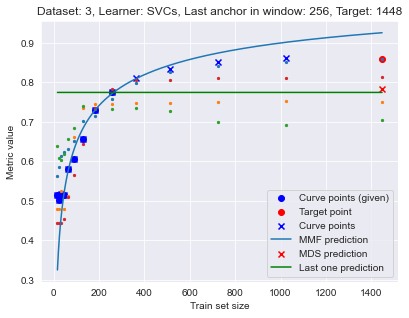

In [5]:
win.PlotCurveAndPrediction(0,3,8,12, legend = True)
#plt.savefig('Plots/predictions.png', dpi = 800)

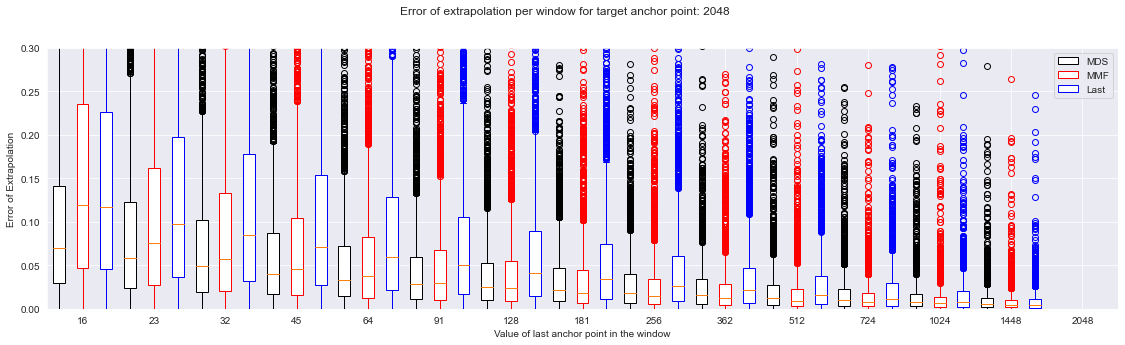

In [6]:
win.Boxplots(target = -2, ylim = [0,0.3], save = 'Plots/target2048.png', dpi = 800)

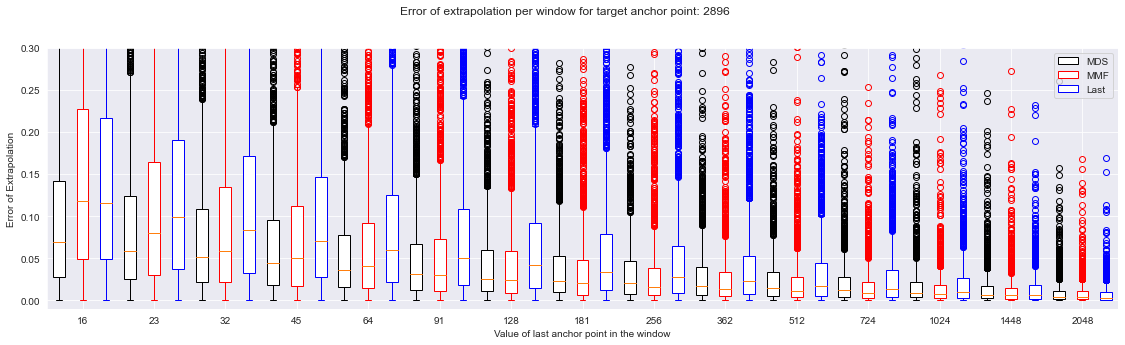

In [4]:
win.Boxplots(target = -1, ylim = [-0.01,0.3], save = 'Plots/arbitrary.png', dpi = 800)

In [6]:
win.help()

This class is used to analyse the results of different learning curve regression methods.
The results are stored in a dictionary called 'results'. To access them use the following syntax: self.results['method']['test error'][datasetID, learnerID, windowID, targetID]
To plot the results of a specific method, use the following functions: 

PlotCurveAndPrediction: plots the predictions and true values for a specific dataset, learner, window and target. This gives a zoomed in view of what is happening.

Boxplots: Given a specific slice of the dataset, learner, window and target, this function makes the corresponding boxplots. You can specify what you want to plot the boxplots over, by setting the xaxis parameter to 'dataset', 'learner', 'window' or 'target'.

